# Radiometers Demo

### Step 1: 

Read in and plot Total (or Global), Direct Normal, Diffuse irradiances from the SOLRAD site (Seattle) for the major wildfire event (2020).



In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

In [4]:
doys = np.arange(249, 366, 1)
data = pd.DataFrame()

for doy in doys:
    fn = f'data/sea20{doy.astype(int).astype(str).zfill(3)}.dat'
    data_i = pd.read_table(fn, skiprows = 2, delimiter = '\s+', header = None, engine = 'python')
    data = pd.concat([data, data_i])

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_59118/847325342.py:6: SyntaxWarning: invalid escape sequence '\s'
  data_i = pd.read_table(fn, skiprows = 2, delimiter = '\s+', header = None, engine = 'python')


In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,",2020,249,9,5,0,0,0.000,63.78,334.3,0,550.3,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,",2020,249,9,5,0,1,0.017,63.94,327.4,0,538.5,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,",2020,249,9,5,0,2,0.033,64.09,324.6,0,535.5,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,",2020,249,9,5,0,3,0.050,64.25,321.2,0,533.6,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,",2020,249,9,5,0,4,0.067,64.41,320.2,0,536.9,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2020,365.0,12.0,30.0,23.0,55.0,23.917,86.36,38.2,0.0,...,38.9,0.0,0.6,0.0,24.8,0.0,0.794,0.000,0.836,0.099
1436,2020,365.0,12.0,30.0,23.0,56.0,23.933,86.48,35.0,0.0,...,35.7,0.0,0.5,0.0,24.8,0.0,1.021,0.000,1.022,0.065
1437,2020,365.0,12.0,30.0,23.0,57.0,23.950,86.60,31.3,0.0,...,32.0,0.0,0.5,0.0,24.8,0.0,1.135,0.000,1.208,0.015
1438,2020,365.0,12.0,30.0,23.0,58.0,23.967,86.72,27.0,0.0,...,27.7,0.0,0.5,0.0,24.8,0.0,1.362,0.244,1.301,0.000


In [5]:
data.columns = ['', 'year', 'jday', 'month', 'day',
                'hour', 'min', 'dt', 'zen', 'dw_psp',
                'qc_dwpsp', 'direct', 'qc_direct', 'diffuse', 
                'qc_diffuse', 'uvb', 'qc_uvb', 
                'uvb_temp', 'qc_uvb_temp', 'std_dw_psp', 
                'std_direct', 'std_diffuse', 'std_uvb']

ValueError: Length mismatch: Expected axis has 22 elements, new values have 23 elements

In [204]:
data = data[(data.qc_direct == 0) & (data.qc_diffuse == 0)]
data['time'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str) + '-' + data['day'].astype(str) + ' ' + data['hour'].astype(str) + ':' + data['min'].astype(str))
data['sum'] = data['diffuse'] + data['direct'] * np.cos(np.deg2rad(data['zen']))
# data['sum'] = data['diffuse'] + data['direct'] + np.cos(np.deg2rad(data['zen']))

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/1643619501.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/1643619501.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


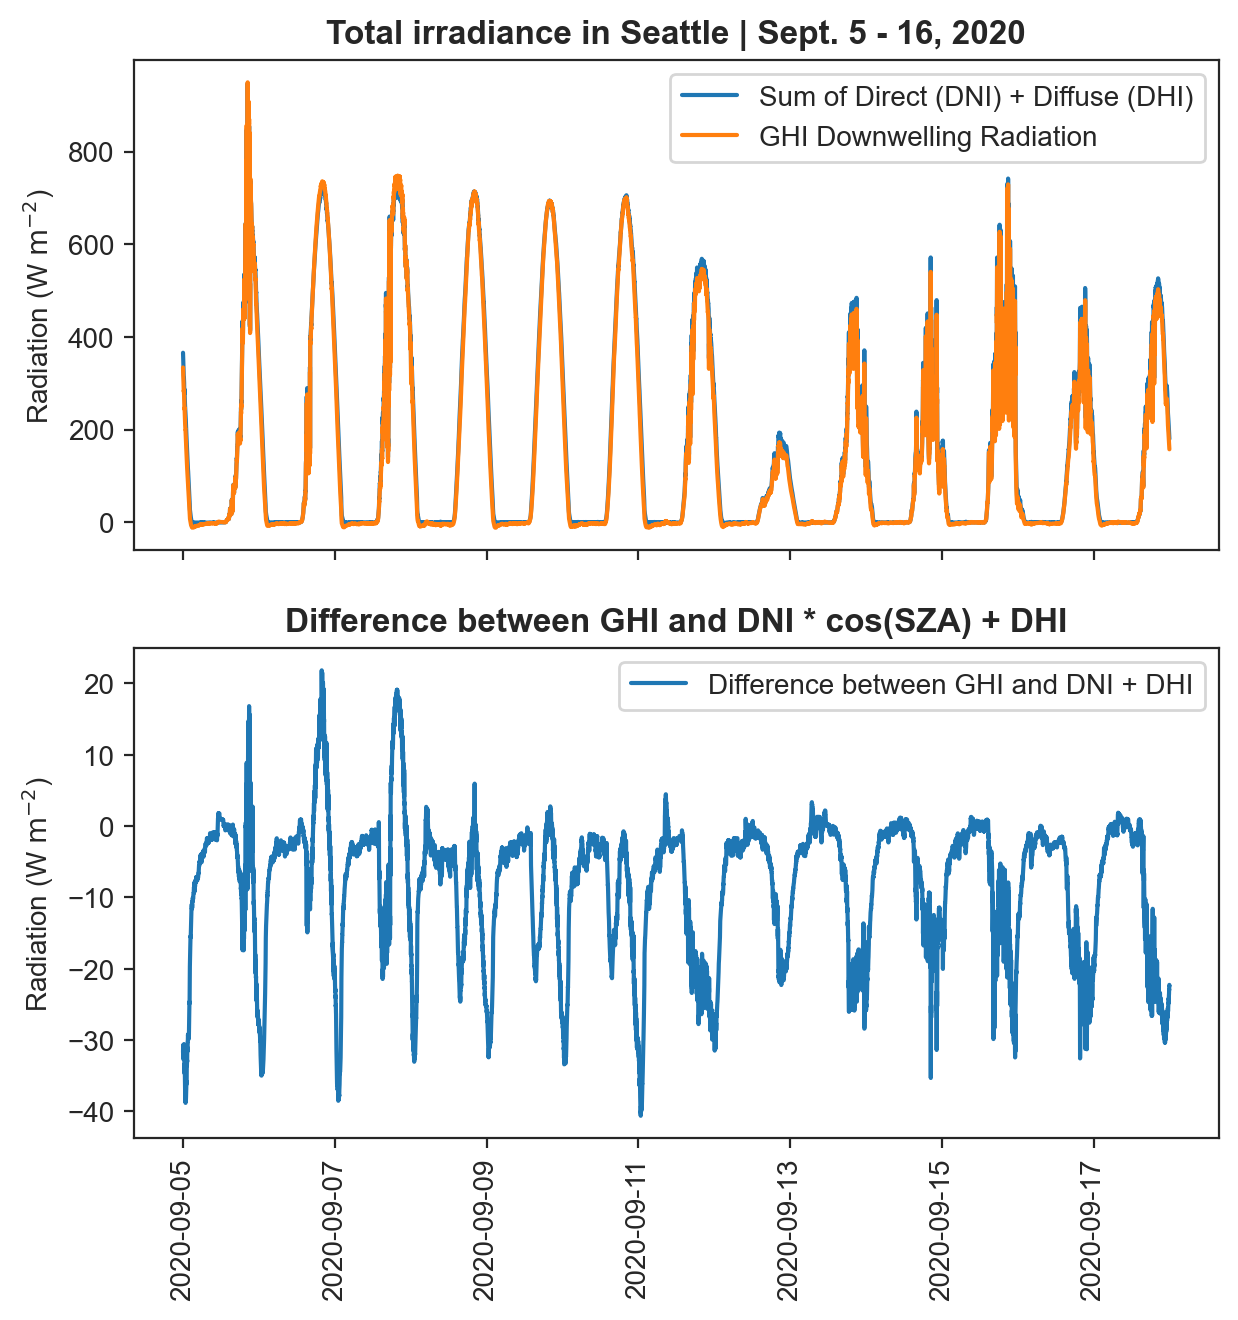

In [205]:
fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize = (7,7))
ax.plot(data['time'], data['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax.plot(data['time'], data['dw_psp'], label = 'GHI Downwelling Radiation')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Total irradiance in Seattle | Sept. 5 - 16, 2020', weight = 'bold')

ax2.plot(data['time'], data['dw_psp'] - data['sum'], label = 'Difference between GHI and DNI + DHI')
ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax2.set_title('Difference between GHI and DNI * cos(SZA) + DHI', weight = 'bold')
ax2.legend()
# ax.set_xlim([pd.to_datetime('2020-09-07'), pd.to_datetime('2020-09-08')])
ax.legend()

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/3036766746.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/3036766746.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


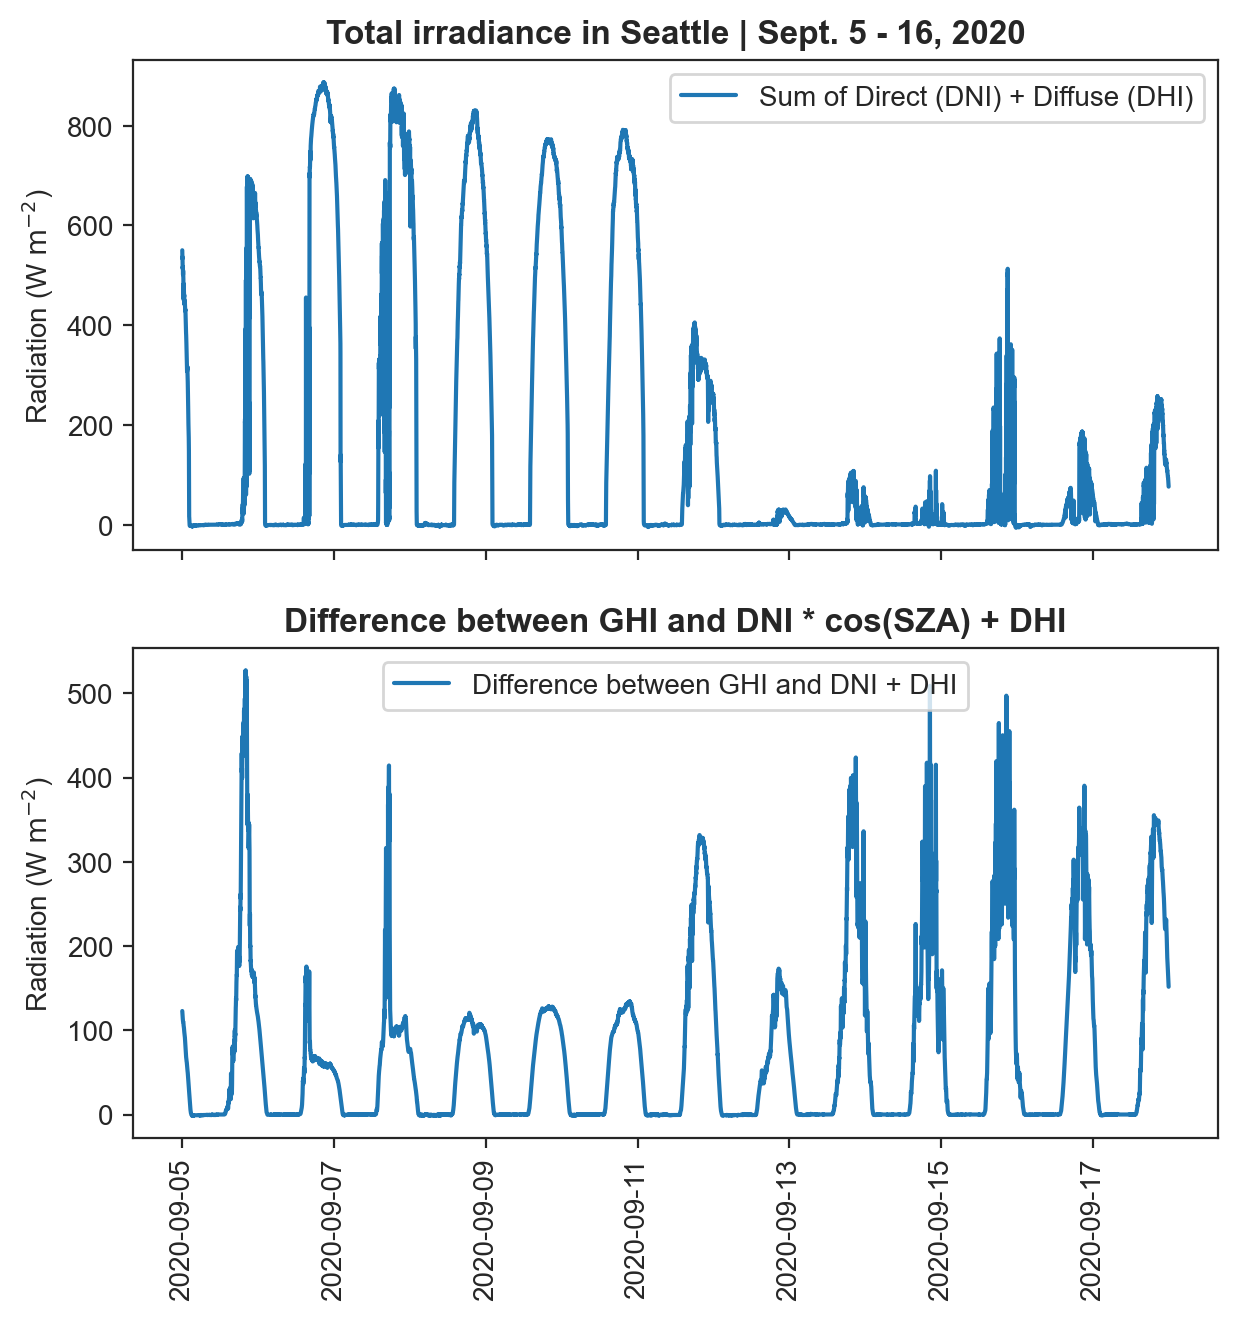

In [206]:
fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize = (7,7))
ax.plot(data['time'], data['direct'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
# ax.plot(data['time'], data['dw_psp'], label = 'GHI Downwelling Radiation')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Total irradiance in Seattle | Sept. 5 - 16, 2020', weight = 'bold')

ax2.plot(data['time'], data['diffuse'], label = 'Difference between GHI and DNI + DHI')
ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax2.set_title('Difference between GHI and DNI * cos(SZA) + DHI', weight = 'bold')
ax2.legend()
# ax.set_xlim([pd.to_datetime('2020-09-07'), pd.to_datetime('2020-09-08')])
ax.legend()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/2902936168.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


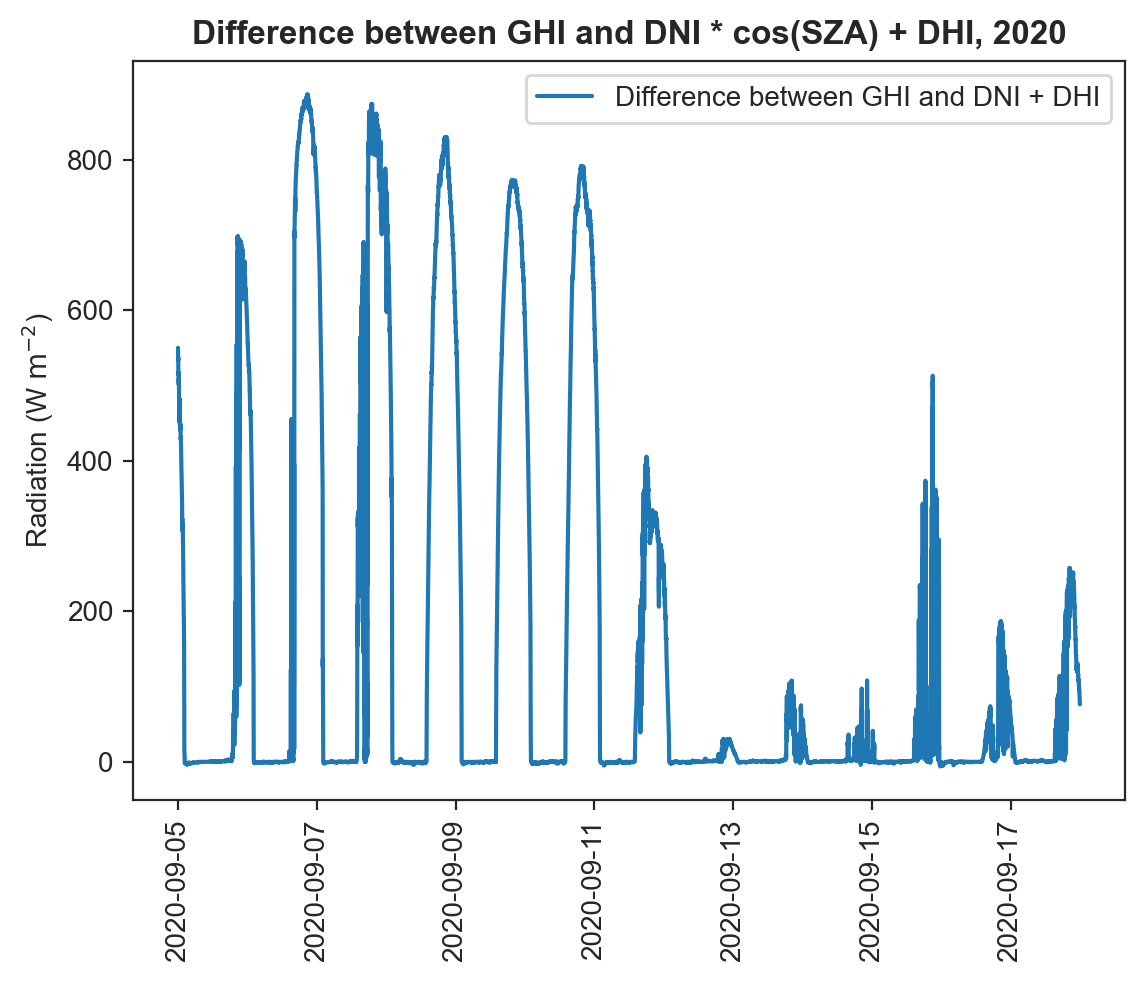

In [197]:
fig, ax = plt.subplots()
ax.plot(data['time'], data['direct'], label = 'Difference between GHI and DNI + DHI')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Difference between GHI and DNI * cos(SZA) + DHI, 2020', weight = 'bold')
ax.legend()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/2883206137.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


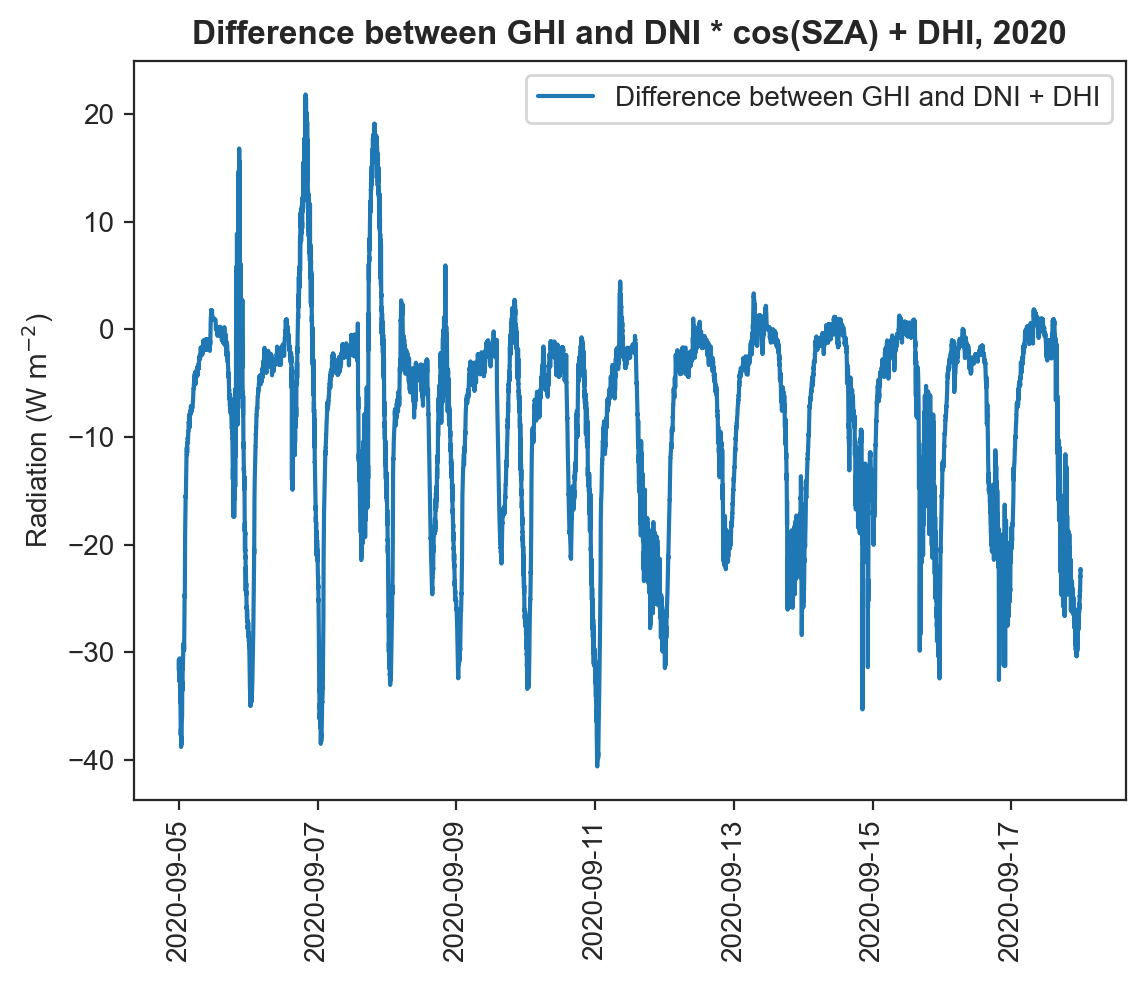

In [198]:
fig, ax = plt.subplots()
ax.plot(data['time'], data['dw_psp'] - data['sum'], label = 'Difference between GHI and DNI + DHI')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Difference between GHI and DNI * cos(SZA) + DHI, 2020', weight = 'bold')
ax.legend()

In [164]:
night = data[(data['hour'] >= 4) & (data.hour <= 11)]
morning = data[(data['hour'] >= 12) & (data.hour <= 18)]
afternoon = data[(data['hour'] >= 19)]

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/3134810067.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


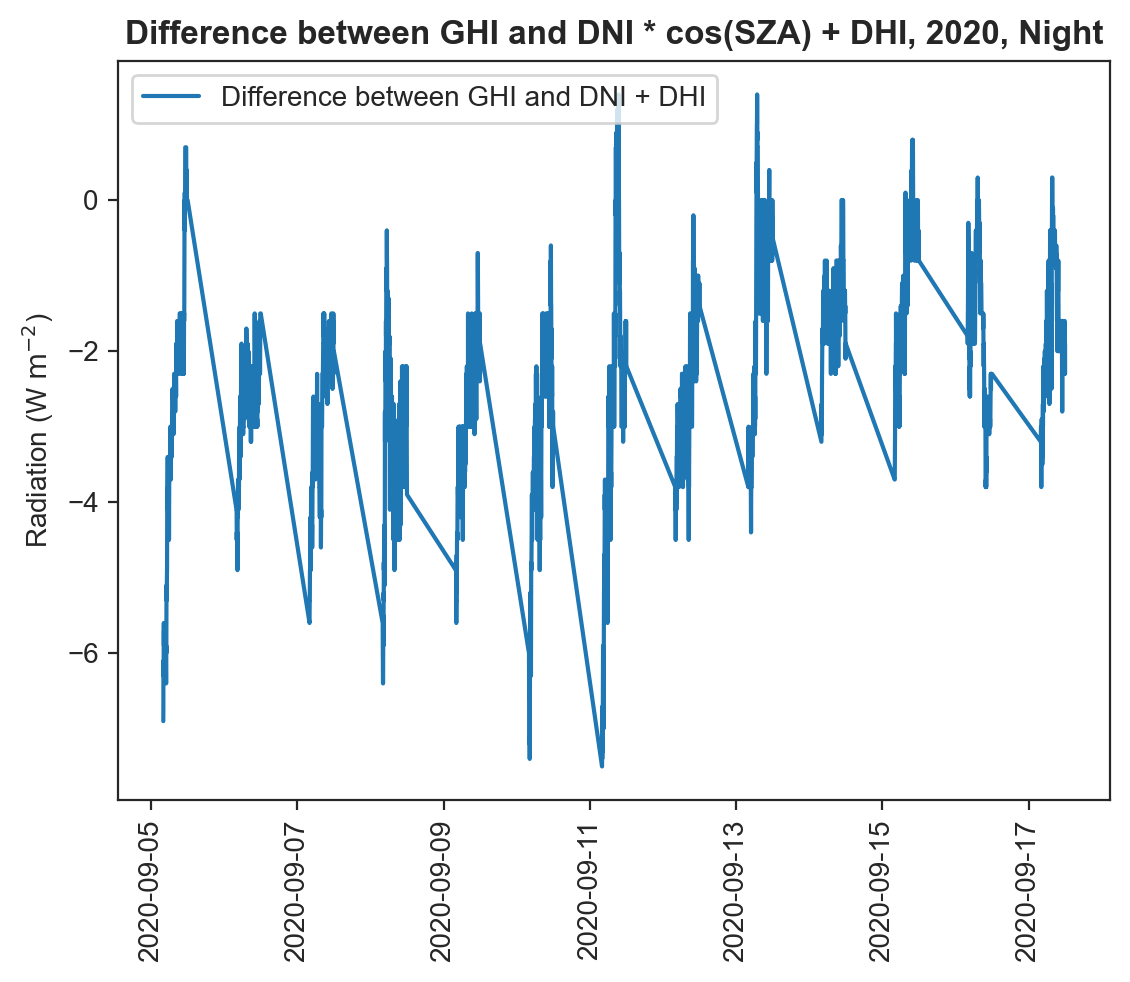

In [157]:
fig, ax = plt.subplots()
ax.plot(night['time'], night['dw_psp'] - night['sum'], label = 'Difference between GHI and DNI + DHI')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Difference between GHI and DNI * cos(SZA) + DHI, 2020, Night', weight = 'bold')
ax.legend()

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/1421158518.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


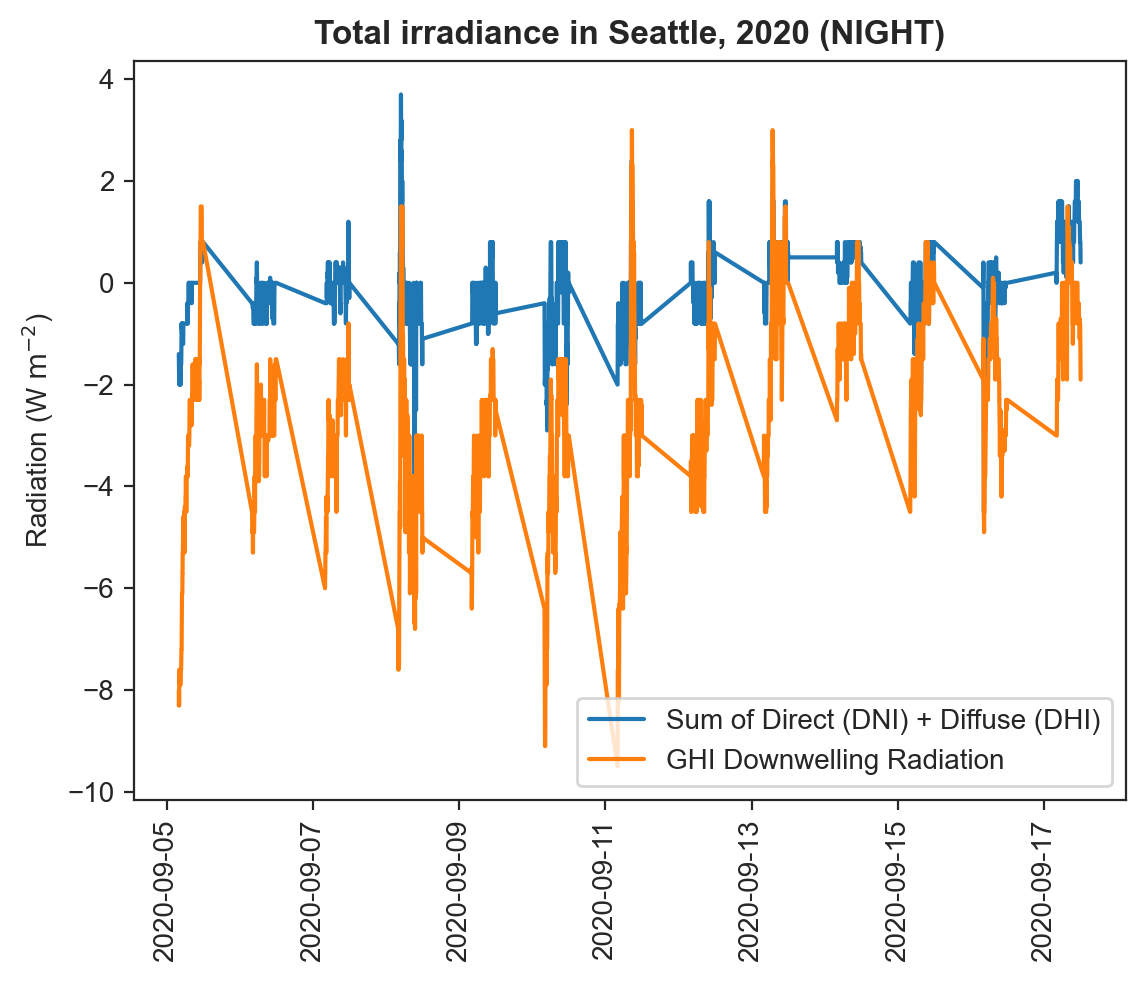

In [162]:
fig, ax = plt.subplots()
ax.plot(night['time'], night['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax.plot(night['time'], night['dw_psp'], label = 'GHI Downwelling Radiation')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Total irradiance in Seattle, 2020 (NIGHT)', weight = 'bold')
ax.legend()

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/3539939413.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


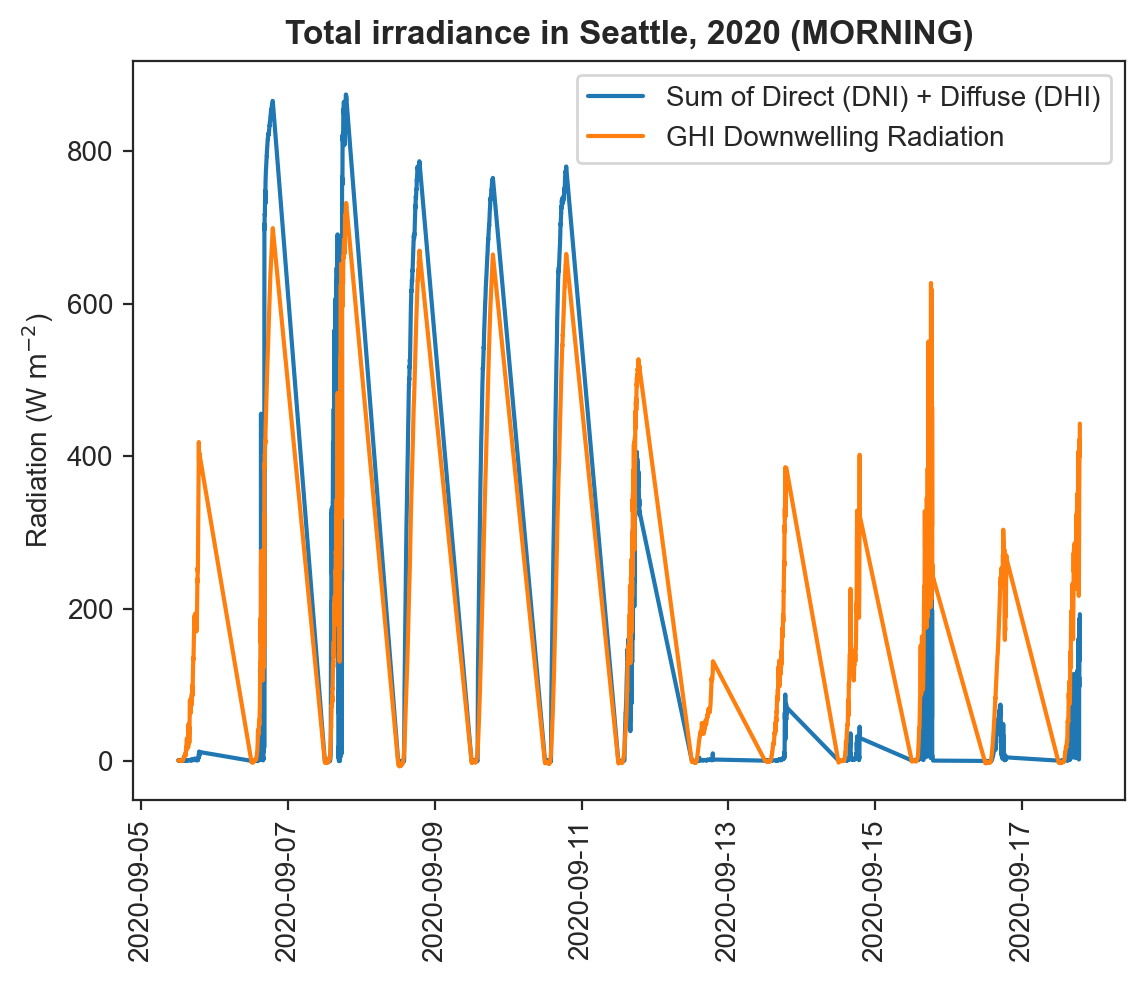

In [163]:
fig, ax = plt.subplots()
ax.plot(morning['time'], morning['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax.plot(morning['time'], morning['dw_psp'], label = 'GHI Downwelling Radiation')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Total irradiance in Seattle, 2020 (MORNING)', weight = 'bold')
ax.legend()

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_52551/589695984.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


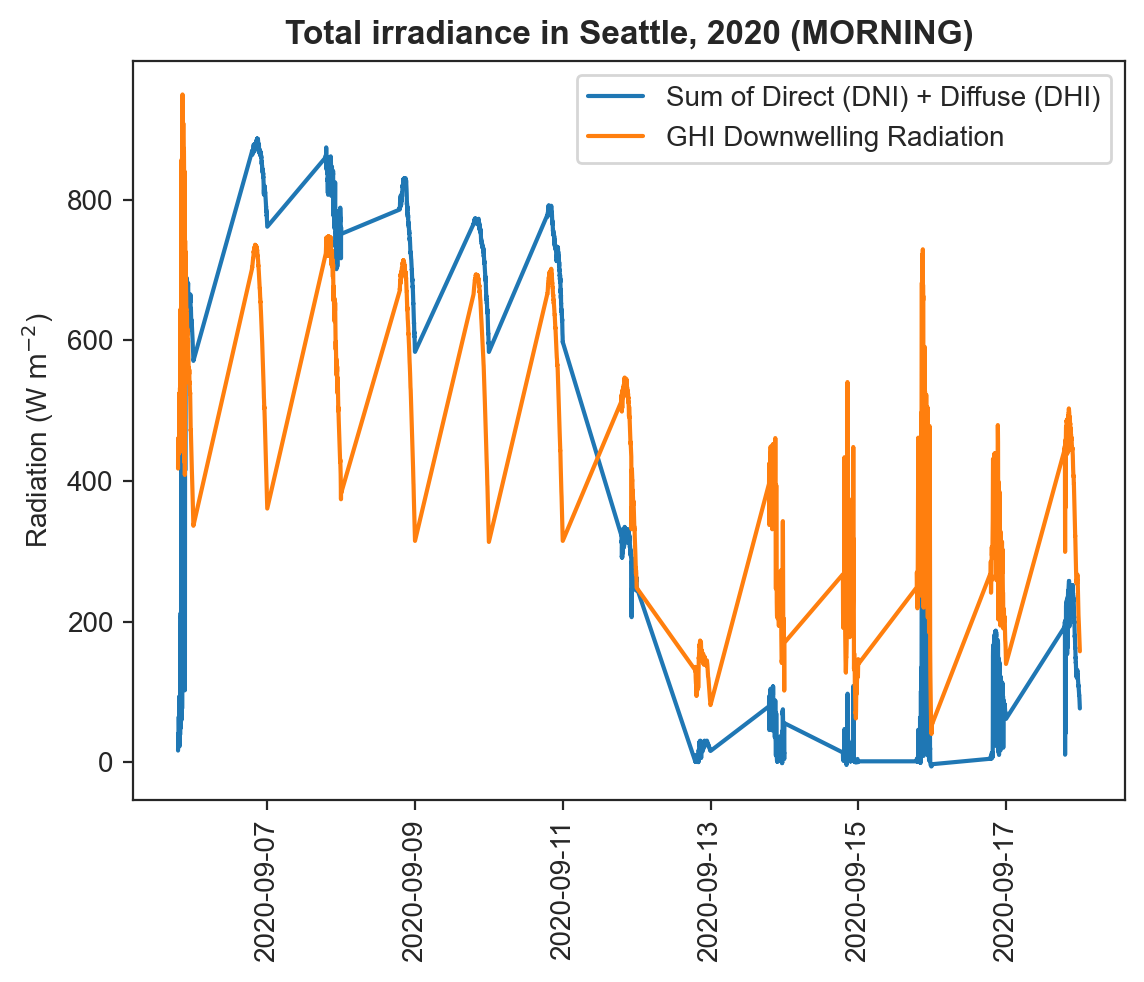

In [165]:
fig, ax = plt.subplots()
ax.plot(afternoon['time'], afternoon['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax.plot(afternoon['time'], afternoon['dw_psp'], label = 'GHI Downwelling Radiation')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Total irradiance in Seattle, 2020 (MORNING)', weight = 'bold')
ax.legend()